---
# 데이터 불러오기
---

In [2]:
import pandas as pd
df = pd.read_csv('../data/smartphone.csv', encoding='utf-8')
galaxy_posts = df.get('Title') + " " + df.get('Description')

In [3]:
df.head()

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요,https://blog.naver.com/rladbrud8791?Redirect=L...,사실 제가 최근까지도 고민하고 있었던 부분이 바로 아이의 스마트폰 필요성 때문인데요...,갱이랑 정이랑♡,https://blog.naver.com/rladbrud8791,20220226,\n\n\n\n\n\n\n리뷰\n\n\n\n\nZEM 초등학생 스마트폰 관리앱으로 ...
1,아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰,https://blog.naver.com/hongganz?Redirect=Log&l...,애플의 보급형 스마트폰 아이폰 SE3 가 출시한다. 보통 대부분의 스마트폰들은 급나...,이웃삼촌이 들려주는 IT 이야기,https://blog.naver.com/hongganz,20220313,\n\n\n\n\n\n\n\n\n\n출시 정보\n\n\n\n\n아이폰 SE3 사전예...
2,왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기,https://blog.naver.com/tnwpqla?Redirect=Log&lo...,하다가 스마트폰 삼각대 를 구매를 해야겠단 생각을 해서 제대로 된 것을 알아보려고 ...,초컬렛::대학생 블로그,https://blog.naver.com/tnwpqla,20220310,\n\n\n\n\n\n\n협찬+포스팅알바\n\n\n\n\n왜 다들 스마트폰 삼각대 ...
3,스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로!,https://blog.naver.com/dogslife78?Redirect=Log...,최근 컴퓨터나 노트북 뿐만 아니라 항상 소지하고 다니는 스마트폰이나 태블릿과 같은 ...,노숙페이스,https://blog.naver.com/dogslife78,20220301,"\n\n\n\n\n\n\n가전, 그리고 IT\n\n\n\n\n스마트폰 백업 필요하다..."
4,"맥갤럭시 스마트폰 연결, 백업",https://blog.naver.com/yhj5738?Redirect=Log&lo...,스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는 맥에서 Smaert Switc...,Dream girl's life,https://blog.naver.com/yhj5738,20220304,"\n\n\n\n\n\n\n관리방법\n\n\n\n\n맥갤럭시 스마트폰 연결, 백업 \..."


In [4]:
galaxy_posts.head()

0    ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요 사실 제가 최근까지도 고민하고 있었...
1    아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰 애플의 보급형 스...
2    왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기 하다가 스마트폰 삼각대 를...
3    스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로! 최근 컴퓨터나 노트북 뿐...
4    맥갤럭시 스마트폰 연결, 백업 스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는...
dtype: object

# 불용어 제거

In [6]:
from eunjeon import Mecab
tagger = Mecab()

In [7]:
galaxy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galaxy_stop_words = galaxy_stop_words.split(' ')
galaxy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

# 명사만 추출 

In [8]:
galaxy_nouns = []
for post in galaxy_posts:
    for noun in tagger.nouns(post):
        if noun not in galaxy_stop_words: #불용어가 아니라면
            galaxy_nouns.append(noun)
            
galaxy_nouns[0:10]

['초등학생', '스마트폰', '관리', '앱', '걱정', '제', '최근', '고민', '부분', '아이']

In [9]:
from collections import Counter
# 시퀀스 자료형의 데이터 요소 개수를 딕셔너리 형태로 반환하는 자료구조
    # 요소 중 값이 같은 것이 몇 개인지 반환한다.
num_top_nouns = 20
galaxy_nouns_counter = Counter(galaxy_nouns)
galaxy_top_nouns = dict(galaxy_nouns_counter.most_common(num_top_nouns)) # dict() 저장 
galaxy_top_nouns

{'스마트폰': 3133,
 '강의': 381,
 '사진': 370,
 '사용': 316,
 '갤럭시': 268,
 '카메라': 212,
 '동영상': 204,
 '앱': 190,
 '제작': 184,
 '유튜브': 184,
 '삼성': 180,
 '반응': 177,
 '스마트': 176,
 '활용': 170,
 '촬영': 165,
 '방법': 164,
 '안드로이드': 133,
 '화면': 117,
 '강': 116,
 '영상': 109}

#  워드 크라우드

In [ ]:
#!pip install wordcloud

In [10]:
from wordcloud import WordCloud

font = 'C:/Users/nadai/code/MLP/NanumBarunGothic.ttf'

galaxy_wc = WordCloud(background_color="white", font_path=font)
galaxy_wc.generate_from_frequencies(galaxy_top_nouns)

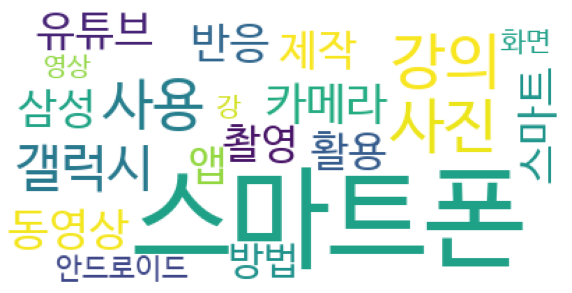

In [11]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(galaxy_wc)

# 카운트 기반 단어표현 tf-idf

- 요약
    - 값을 곱한 tf-idf는 
    - 1에 가까울 수록 중요도가 높고 
    - 0에 가까울 수록 중요도가 낮음

- 1.TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)
    - 단어의 빈도와 역 문서 빈도를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
    - 사용 예:
        - 문서의 유사도를 구하는 작업 
        - 검색 시스템에서 검색 결과의 중요도를 정하는 작업
        - 문서 내에서 특정 단어의 중요도를 구하는 작업
    - tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
    - df(t) : 특정 단어 t가 등장한 문서의 수
    - idf(d, t) : df(t)에 반비례하는 수

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
galaxy_tfidv = TfidfVectorizer().fit(galaxy_top_nouns)
galaxy_tfidv.transform(galaxy_posts).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ]])

In [13]:
pd.DataFrame(galaxy_tfidv.transform(galaxy_posts).toarray())  # 배열 >> 데이터프레임 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.894427,0.447214,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
996,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
997,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
998,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.000000,0.577350,0.0,0.0,0.57735,0.0,0.0,0.000000,0.0,0.0
